In [1]:
import pandas as pd
from LinearRegression import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("Small-diameter-flow.csv",index_col=0)
lr = LinearRegression((df['Flow']), df.drop('Flow', axis=1))

Scatter plots are used to provide a general illustration of the underlying relationship between features.<br>
The **Kinematic-Flow**, **Geometric-Flow** and **Inertial-Flow** plots demonstrate positive correlation, while the **Observer-Flow** demonstrates no correlation.

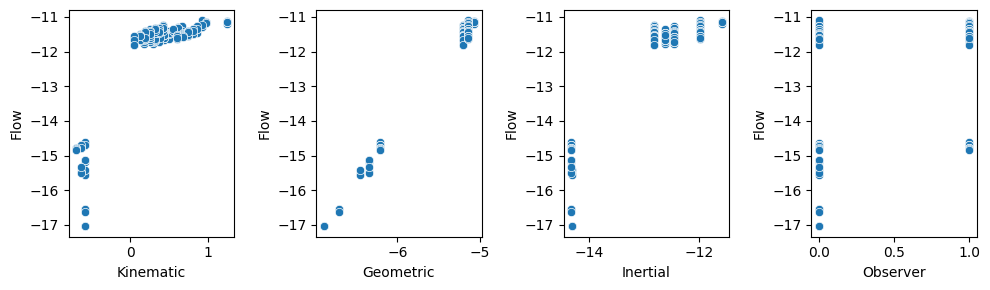

In [2]:
fig, ax = plt.subplots(1, lr.d, figsize=(10,3), dpi =100)

for i, feature in enumerate(df.columns[1:]):
    sns.scatterplot(data=df, x=feature, y='Flow', ax=ax[i])
    
fig.tight_layout()

The Pearson correlation coefficient is used in order to investigate whether correlation implies linear dependence.<br><br>
According to correlation coefficients, one can assume strong linear relationships between **Flow** and **Kinematic**, **Geometric** and **Inertial** features. The correlation coefficient for the **Observer**, which is close to 0, demonstrates that there is no relationship, or that this relationship is non-linear. 

In [3]:
df.corr()['Flow'][1:]

Kinematic    0.863403
Geometric    0.995794
Inertial     0.903310
Observer     0.181490
Name: Flow, dtype: float64

The relevance of the regression - R-squared - reveals that approximately 99% of the variability in responce variable can be explained by the regression model. However, this value should be interpreted in the context and combined with other metrics due to R-squared-value's sensitivity to overfitting. <br><br>
High R-squared value/low p-value combination indicates that the model fits the data well.


In [4]:
print(f"The variance: {lr.variance:.5f}")
print(f"The standard deviation: {lr.std_deviation:.5f}")
print(f"The significance of the regression: {lr.p_value}")
print(f"The relevance of the regression: {lr.Rsq}. ")

The variance: 0.00627
The standard deviation: 0.07920
The significance of the regression: 1.726518234856016e-139
The relevance of the regression: 0.9971526073276518. 


R-squared value can be interpreted as the value for confidence interval, hence the level of significance is following:

In [5]:
lr.signif_level

0.003

The p-values represent the significance of each feature's contribution to the model.<br><br>
Because the p-values for all features are below the level of significance one can conclude that all features are statistically significant and should be retained. 

In [6]:
lr.print_p_value

P-value for Kinematic: 5.730580014551359e-236
P-value for Geometric: 0.0
P-value for Inertial: 1.1628066686844733e-241
P-value for Observer: 2.3422411211740835e-44


In [7]:
lr.confidence_intervall

The confidence interval for Kinematic: [0.8815713143775908, 0.8584441055108235]
The confidence interval for Geometric: [3.6110440964543264, 3.5952572749161704]
The confidence interval for Inertial: [-0.7425543553683894, -0.761224808750305]
The confidence interval for Observer: [0.01963681323627032, 0.014124194996046883]


The Pearson correlation coefficient between all pairs of features is used in order to investigate whether there is correlation between them.<br><br>
Acccording to Pearson coefficient, there is a strong linear relationship between **Kinematic** and **Geometric**, **Kinematic** and **Inertial**, **Geometric** and **Inertial**.<br> The presence of collinearity makes it difficult to understand the true relationship between responce variable and features. 

In [11]:
lr.print_corr

The Pearson correlation between Kinematic and Geometric: 0.8631350761065916
The Pearson correlation between Kinematic and Inertial: 0.9686707504997815
The Pearson correlation between Kinematic and Observer: 0.1032265894384398
The Pearson correlation between Geometric and Inertial: 0.9183300308547002
The Pearson correlation between Geometric and Observer: 0.17519913369993179
The Pearson correlation between Inertial and Observer: 0.12198107336291036


Is there an **Observer** bias in the data collected for the small-diameter flow measurements? <br><br>
Because the p-value for **Observer** feature is below the level of significance one can conclude that the feature is statistically significant. 


In [9]:
lr.print_p_value

P-value for Kinematic: 5.730580014551359e-236
P-value for Geometric: 0.0
P-value for Inertial: 1.1628066686844733e-241
P-value for Observer: 2.3422411211740835e-44
